# Линейная регрессия

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

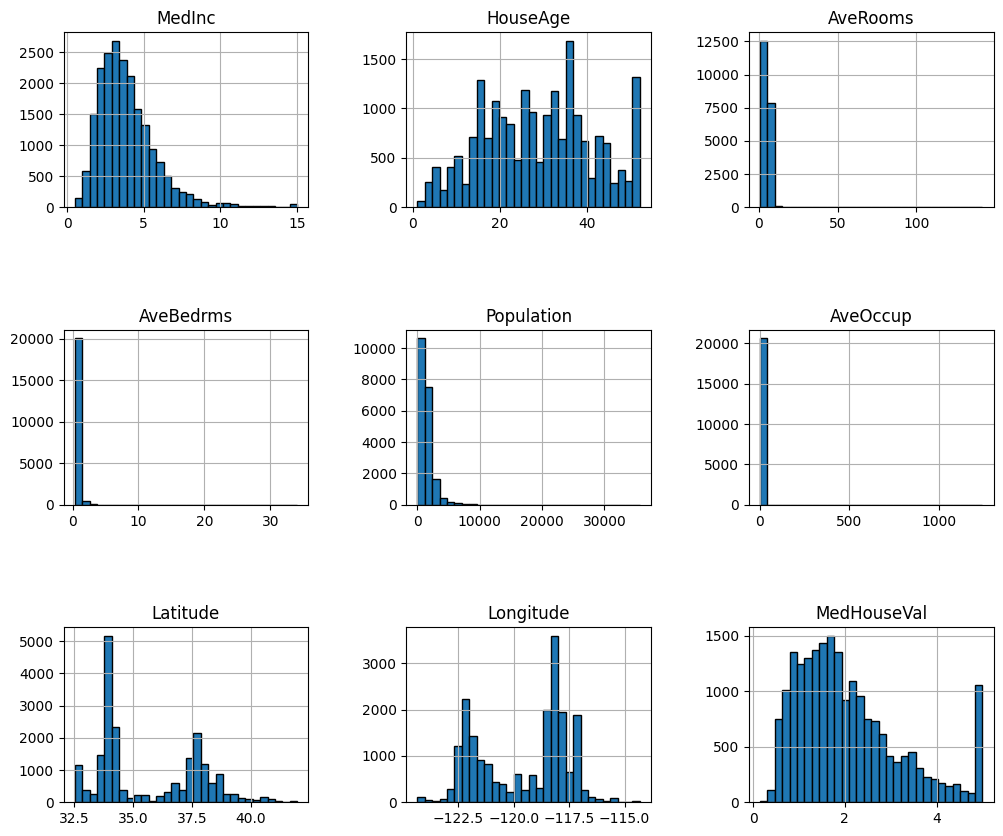

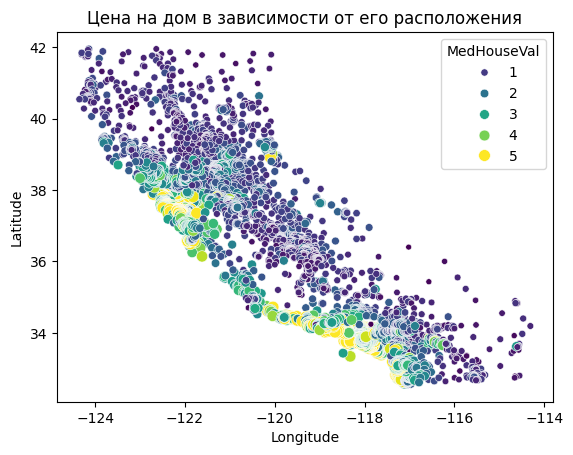

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64
Root mean squared error: 0.5367808835096931
Mean absolute error: 0.5353782997895156


NameError: name 'np' is not defined

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
california_housing = fetch_california_housing(as_frame=True)

# Описание датасета
print(california_housing.DESCR)

# Визуализация фрагмента датасета
print(california_housing.frame.head())

# Информация о датасете
print(california_housing.frame.info())

# Гистограммы распределения признаков
california_housing.frame.hist(bins=30, figsize=(12, 10), edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

# Построение графика распределения цен на дома в зависимости от координат
sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude", size="MedHouseVal", hue="MedHouseVal", palette="viridis")
plt.legend(title="MedHouseVal", loc="upper right")
plt.title("Цена на дом в зависимости от его расположения")
plt.show()

# Корреляция между признаками
correlations = california_housing.frame.corr()
print(correlations['MedHouseVal'].sort_values(ascending=False))

# Разделение датасета на обучающую и тестовую выборки
train_set, test_set = train_test_split(california_housing.frame, test_size=0.15, random_state=42)
X_train = train_set.drop(columns=['MedHouseVal'])
Y_train = train_set['MedHouseVal']
X_test = test_set.drop(columns=['MedHouseVal'])
Y_test = test_set['MedHouseVal']

# Обучение модели линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Предсказание цен на дома из тестового набора данных
Y_predicted = lin_reg.predict(X_test)

# Оценка модели
rmse = mean_squared_error(Y_test, Y_predicted)
print('Root mean squared error:', rmse)
mae = mean_absolute_error(Y_test, Y_predicted)
print('Mean absolute error:', mae)

# Истинные значения цен и предсказанные значения моделью
print('True values:', np.array(Y_test))
print('Predicted values:', Y_predicted)


# Решение Задания (по желанию)

Выбираем только трех признаков

In [2]:
X_train_selected = train_set[['MedInc', 'Longitude', 'Latitude']]
X_test_selected = test_set[['MedInc', 'Longitude', 'Latitude']]

бучение модели множественной линейной регрессии на выбранных признаках

In [3]:
lin_reg_selected = LinearRegression()
lin_reg_selected.fit(X_train_selected, Y_train)

LinearRegression()

Предсказание цен на дома из тестового набора данных с выбранными признаками

In [4]:
Y_predicted_selected = lin_reg_selected.predict(X_test_selected)

Оценка точности модели с выбранными признаками

In [5]:
rmse_selected = mean_squared_error(Y_test, Y_predicted_selected)
print('Root mean squared error (selected features):', rmse_selected)
mae_selected = mean_absolute_error(Y_test, Y_predicted_selected)
print('Mean absolute error (selected features):', mae_selected)

Root mean squared error (selected features): 0.5630075944824495
Mean absolute error (selected features): 0.5503399770846299
